In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [10]:
pd.options.display.max_columns

20

## Consumo de drogas kaggle:

### - queremos averiguar si una persona tiene más riesgo de caer en tenden

#### NEO-FFI (versión reducida)
#### Existe una versión reducida del Inventario de Personalidad NEO Revisado, llamada NEO-FFI; esta versión se compone únicamente de 60 ítems, y evalúa los #### mismos factores que el NEO-PIR.

### - fuente: https://www.kaggle.com/datasets/santiago123678/evolution-of-humans-datasets-for-clasification

## Evolución kaggle:

### - modeo de clasificación para saber el género y especie

### - fuente: https://www.kaggle.com/datasets/santiago123678/evolution-of-humans-datasets-for-clasification

In [11]:
df2=pd.read_csv('../data/raw/Evolution_DataSets.csv')
df2.head(10)

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
5,Homo Rodhesiensis,0.679447,Africa,oriental,Ethiopia,savannah,1155.28124,144.77589,big,U shape,...,modern,manipulate with precision,walk,omnivore,medium-high,slim,yes,mixed,no,robust
6,Australopithecus Afarensis,3.788978,Africa,oriental,Kenya,mixed,305.31366,138.47796,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
7,hominino Sahelanthropus tchadensis,7.551967,Africa,central,Republic of Chad,mixed,258.04823,91.23118,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
8,Homo Neanderthalensis\n,0.547326,Europa,central,Germany,cold forest,1156.08025,158.10385,big,modern,...,modern,manipulate with precision,walk,carnivorous,medium-high,very modern,modern,very modern,no,robust
9,Australopithecus Anamensis,4.180914,Africa,oriental,Kenya,forest-gallery,460.06068,117.35674,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light


## EDA

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape         

In [13]:
df2.shape

(12000, 28)

####  'Genus_&_Specie': Esta columna contiene el género y el nombre específico de la especie. Proporciona información taxonómica sobre cada homínido incluido en el conjunto de datos, permitiendo una identificación precisa

In [14]:
df2['Genus_&_Specie'].unique()## posible variable a predecir classif

array(['hominino Orrorin tugenencin',
       'hominino Ardipithecus ramidus / kabadda',
       'Australopithecus Afarensis', 'Australopithecus Anamensis',
       'Australopithecus Africanus', 'Homo Rodhesiensis',
       'hominino Sahelanthropus tchadensis', 'Homo Neanderthalensis\n',
       'Paranthropus Aethiopicus', 'Homo Erectus', 'Homo Naledi',
       'Homo Floresiensis', 'Paranthropus Boisei', 'Homo Rudolfensis',
       'Homo Habilis', 'Homo Sapiens', 'Homo Antecesor', 'Homo Ergaster',
       'Australopithecus Sediba', 'Homo Georgicus',
       'Australopithecus Bahrelghazali', 'Australopithecus Garhi',
       'Paranthropus Robustus', 'Homo Heidelbergensis'], dtype=object)

In [15]:
df2['Genus_&_Specie'].nunique()

24

####  Esta columna indica el período de tiempo durante el cual vivió cada especie de homínido. Ayuda a establecer el contexto cronológico y entender la distribución temporal de diferentes grupos de homínidos.

##### The time period is a float feature, and it's in Millions of years, like 7.7 is equal 7,700,000

In [16]:
df2['Time'].nunique()## numerica categórica

12000

### Columnas sobre la región: ['Location','Zone','Current_Country','Habitat']
#### * 'Hábitat' : Proporciona información sobre el nicho ecológico y las estrategias de adaptación de diferentes homínidos a lo largo de la historia.

In [17]:
df2['Location'].unique()#classif

array(['Africa', 'Europa', 'Asia '], dtype=object)

In [18]:
df2['Zone'].unique()#classif

array(['oriental', 'south', 'central', 'west'], dtype=object)

In [19]:
df2['Current_Country'].unique()#classif

array(['Kenya', 'Ethiopia', 'South Africa', 'Republic of Chad', 'Germany',
       'Indonesia', 'Spain', 'Georgia'], dtype=object)

In [20]:
df2['Habitat'].unique()#classif

array(['forest', 'mixed', 'forest-gallery', 'savannah', 'cold forest',
       'forest-savanna', 'jungle', 'peninsular'], dtype=object)

#### La capacidad craneal es un indicador clave del tamaño del cerebro y puede ofrecer información sobre habilidades cognitivas y tendencias evolutivas

In [21]:
df2['Cranial_Capacity'].unique()### numerica

array([144.5141 , 293.96021, 264.79849, ..., 222.9113 , 466.86762,
       626.73209])

In [22]:
df2['Height'].unique() ### numerica

array([110.24323, 107.69018, 123.76644, ...,  95.29501, 101.01866,
       114.62156])

#### Columnas sobre rasgos anatómicos y evolutivos

In [23]:
df2['Incisor_Size'].unique() #classif

array(['small', 'big', 'megadony', 'very small', 'medium large'],
      dtype=object)

##### Jaw shape: humanos forma de V y moderno, y chimpances forma de U, cónico creo que es intermedio pero no estoy segura, 

In [24]:
df2['Jaw_Shape'].unique()# classif

array(['conical', 'U shape', 'modern', 'V shape'], dtype=object)

In [25]:
df2['Torus_Supraorbital'].unique()# classif

array(['very protruding', 'less protruding', 'little protruding',
       'ultra protruding', 'flat'], dtype=object)

In [26]:
df2['Prognathism'].unique()# classif

array(['high', 'medium-high', 'reduced', 'very high', 'medium', 'absent'],
      dtype=object)

##### Posición del forámen magno: cuanto más orientado hacia adelante se sitúa, más erguida es la posición de la especie, por lo que permite determinar el grado de bipedación.

In [27]:
df2['Foramen_Mágnum_Position'].unique()# classif

array(['posterior', 'semi-anterior', 'anterior', 'modern'], dtype=object)

#### Esta columna es un buen indicativo cuanto mayor es el tamaño de los caninos más cerca de los chimpancés, la evolución ha hecho que los diferentes homínidos avancen hacia caninos de menor tamaño

In [28]:
df2['Canine Size'].unique()# classif

array(['big', 'small'], dtype=object)

In [29]:
df2['Canines_Shape'].unique()# classif

array(['conicalls', 'incisiform'], dtype=object)

#### esmalte mas grueso menos evolución


In [30]:
df2['Tooth_Enamel'].unique()# classif

array(['thick', 'thick-medium', 'medium-thick', 'thin', 'very thick',
       'medium-thin', 'very thin'], dtype=object)

#### Australopithecus afarensis parece que podría haber sido el primero en usar herramientas

In [31]:
df2['Tecno'].unique()# classif

array(['no', 'yes', 'likely'], dtype=object)

#### Investigar sobre los valores de esta columna

In [32]:
df2['Tecno_type'].unique()# classif

array(['no', 'mode 2', 'mode 3', 'mode 1', 'mode 4', 'primitive'],
      dtype=object)

#### se relaciona con el forámen magnum position

In [33]:
df2['biped'].unique() ### posible variable a predecir

array(['low probability', 'high probability', 'yes', 'modern'],
      dtype=object)

In [34]:
df2['Arms'].unique()# classif

array(['climbing', 'manipulate with precision', 'manipulate'],
      dtype=object)

In [35]:
df2['Foots'].unique()# classif

array(['climbing', 'walk'], dtype=object)

#### en principio se relaciona con los rasgos anatómicos relacionados con la dentadura

In [36]:
df2['Diet'].unique()# classif

array(['dry fruits', 'soft fruits', 'omnivore', 'carnivorous',
       'hard fruits'], dtype=object)

### A menor grado de dimorfismo sexual menor grado de evolución

In [37]:
df2['Sexual_Dimorphism'].unique()# classif

array(['high', 'medium-high', 'reduced'], dtype=object)

#### Hip: Describe el tamaño de la cadera en cada especie de homínido

In [38]:
df2['Hip'].unique() # classif

array(['wide', 'slim', 'very modern', 'modern'], dtype=object)

#### Vertical_front: Especifica la presencia o ausencia de verticalidad o curvatura del hueso frontal en cada especie de homínido, proporcionando información sobre su morfología craneal.
##### si bien nuestra especie se diferencia por tener una frente más redonda, hay cierto solapamiento con especies extintas, con lo cual el carácter puede que no sea siempre discriminante para reconocer la especie a la que pertenecen algunos individuos fósiles
https://www.cenieh.es/actualidad/noticias/un-estudio-describe-por-primera-vez-la-geometria-del-hueso-frontal-en-el-genero

In [39]:
df2['Vertical_Front'].unique()# classif

array(['no', 'yes', 'modern'], dtype=object)

#### investigar

In [40]:
df2['Anatomy'].unique()# classif

array(['old', 'mixed', 'very modern', 'modern'], dtype=object)

#### Migrated: Indica si cada especie de homínido exhibió migración o movimiento a diferentes áreas geográficas, ofreciendo información sobre sus patrones de dispersión y dinámica poblaciona

In [41]:
df2['Migrated'].unique()# classif

array(['no', 'yes'], dtype=object)

#### A mayor robustez de la masa ósea menor grado evolutivo

In [42]:
df2['Skeleton'].unique()# classif

array(['light', 'refined', 'robust'], dtype=object)

In [43]:
df2.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')

#### Nueva columna donde agrupamos por Genus&Specie y filtramos por 'tiempo' para sacar la media de los años en lo que han vivido cada tipo de hominido.

In [44]:
df2.groupby('Genus_&_Specie')['Time'].mean().sort_values(ascending=False)






#df.loc[df['actual']<=59,'Celsius']=0

Genus_&_Specie
hominino Sahelanthropus tchadensis         7.179310
hominino Orrorin tugenencin                6.206883
Australopithecus Anamensis                 4.379867
hominino Ardipithecus ramidus / kabadda    4.191768
Australopithecus Afarensis                 4.081872
Australopithecus Bahrelghazali             3.694515
Australopithecus Africanus                 3.691841
Paranthropus Aethiopicus                   2.774076
Homo Habilis                               2.696488
Homo Rudolfensis                           2.685932
Australopithecus Garhi                     2.671616
Paranthropus Boisei                        2.485446
Australopithecus Sediba                    2.105093
Paranthropus Robustus                      2.100025
Homo Georgicus                             2.001484
Homo Ergaster                              1.706206
Homo Erectus                               1.495963
Homo Antecesor                             1.181771
Homo Rodhesiensis                          0.8022

In [45]:
df2['Genus_&_Specie']

0                    hominino Orrorin tugenencin
1        hominino Ardipithecus ramidus / kabadda
2                     Australopithecus Afarensis
3                     Australopithecus Anamensis
4                     Australopithecus Africanus
                          ...                   
11995                 Australopithecus Africanus
11996                 Australopithecus Africanus
11997                          Homo Floresiensis
11998                   Paranthropus Aethiopicus
11999                      Paranthropus Robustus
Name: Genus_&_Specie, Length: 12000, dtype: object

In [46]:
df2.loc[df2['Genus_&_Specie']=='hominino Sahelanthropus tchadensis ','Time_mean']= 7.179310
df2.loc[df2['Genus_&_Specie']=='hominino Orrorin tugenencin ','Time_mean']= 6.206883
df2.loc[df2['Genus_&_Specie']=='Australopithecus Anamensis ','Time_mean']= 4.379867
df2.loc[df2['Genus_&_Specie']=='hominino Ardipithecus ramidus / kabadda','Time_mean']= 4.191768
df2.loc[df2['Genus_&_Specie']=='Australopithecus Afarensis','Time_mean']= 4.081872
df2.loc[df2['Genus_&_Specie']=='Australopithecus Bahrelghazali','Time_mean']= 3.694515
df2.loc[df2['Genus_&_Specie']=='Australopithecus Africanus','Time_mean']= 3.691841
df2.loc[df2['Genus_&_Specie']=='Paranthropus Aethiopicus','Time_mean']= 2.774076
df2.loc[df2['Genus_&_Specie']=='Homo Habilis','Time_mean']= 2.696488
df2.loc[df2['Genus_&_Specie']=='Homo Rudolfensis','Time_mean']= 2.685932
df2.loc[df2['Genus_&_Specie']=='Australopithecus Garhi','Time_mean']= 2.671616
df2.loc[df2['Genus_&_Specie']=='Paranthropus Boisei','Time_mean']= 2.485446
df2.loc[df2['Genus_&_Specie']=='Australopithecus Sediba','Time_mean']= 2.105093
df2.loc[df2['Genus_&_Specie']=='Paranthropus Robustus','Time_mean']= 2.100025
df2.loc[df2['Genus_&_Specie']=='Homo Georgicus','Time_mean']= 2.001484
df2.loc[df2['Genus_&_Specie']=='Homo Ergaster','Time_mean']= 1.706206
df2.loc[df2['Genus_&_Specie']=='Homo Erectus','Time_mean']= 1.495963
df2.loc[df2['Genus_&_Specie']=='Homo Antecesor','Time_mean']= 1.181771
df2.loc[df2['Genus_&_Specie']=='Homo Rodhesiensis','Time_mean']= 0.802204
df2.loc[df2['Genus_&_Specie']=='Homo Heidelbergensis','Time_mean']= 0.696047
df2.loc[df2['Genus_&_Specie']=='Homo Naledi','Time_mean']= 0.507376
df2.loc[df2['Genus_&_Specie']=='Homo Floresiensis','Time_mean']= 0.498162
df2.loc[df2['Genus_&_Specie']=='Homo Sapiens','Time_mean']= 0.480819
df2.loc[df2['Genus_&_Specie']=='Homo Neanderthalensis\n','Time_mean']= 0.469192

In [47]:
df2.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton', 'Time_mean'],
      dtype='object')

#### Puede que sea una mejor aproximación establecer rangos de millones de años porque han convivido diferentes especies de hominidos durante millones de años. Investigar

In [48]:
df2.loc[df2['Genus_&_Specie']=='Homo Neanderthalensis\n'].describe()

,Time,Cranial_Capacity,Height,Time_mean
count,500.000000,500.000000,500.000000,5.000000e+02
mean,0.469192,1100.143720,159.863502,4.691920e-01
std,0.275978,90.786316,5.822501,1.111335e-16
min,0.001334,950.066850,150.012630,4.691920e-01
25%,0.236153,1016.520612,154.766660,4.691920e-01
50%,0.471980,1099.408205,159.814545,4.691920e-01
75%,0.714136,1181.629158,165.196593,4.691920e-01
max,0.927972,1248.555190,169.917000,4.691920e-01


In [49]:
df2.loc[df2['Genus_&_Specie']=='Homo Sapiens'].describe()

,Time,Cranial_Capacity,Height,Time_mean
count,500.000000,500.000000,500.000000,5.000000e+02
mean,0.480819,1235.940823,170.097394,4.808190e-01
std,0.291221,86.062940,5.801406,5.556675e-17
min,0.000529,1075.863510,160.090650,4.808190e-01
25%,0.212227,1169.579080,165.191413,4.808190e-01
50%,0.484588,1239.282130,170.226090,4.808190e-01
75%,0.728306,1311.529315,175.140585,4.808190e-01
max,0.999027,1374.516220,179.994120,4.808190e-01


In [50]:
df2.loc[df2['Genus_&_Specie']=='Homo Floresiensis'].describe()

,Time,Cranial_Capacity,Height,Time_mean
count,500.000000,500.000000,500.000000,5.000000e+02
mean,0.498162,294.985992,100.074617,4.981620e-01
std,0.289573,86.774275,5.760216,1.111335e-16
min,0.001098,151.415400,90.027430,4.981620e-01
25%,0.254004,215.552600,94.943628,4.981620e-01
50%,0.486714,292.172385,100.031645,4.981620e-01
75%,0.748269,370.418712,105.213053,4.981620e-01
max,0.999873,449.682540,109.997580,4.981620e-01


#### Vemos que hay una correlación inversa entre la columna de tiempo y nuestras variables numéricas: capacidad craneal, y altura

In [51]:
df2.corr(numeric_only=True)

,Time,Cranial_Capacity,Height,Time_mean
Time,1.000000,-0.662638,-0.594751,0.972520
Cranial_Capacity,-0.662638,1.000000,0.845925,-0.591817
Height,-0.594751,0.845925,1.000000,-0.552315
Time_mean,0.972520,-0.591817,-0.552315,1.000000


<Axes: >

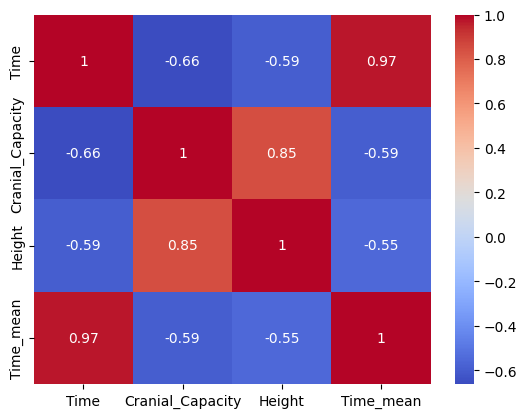

In [52]:
sns.heatmap(df2.corr(numeric_only=True),annot=True,cmap='coolwarm')

<Axes: xlabel='Time_mean', ylabel='Count'>

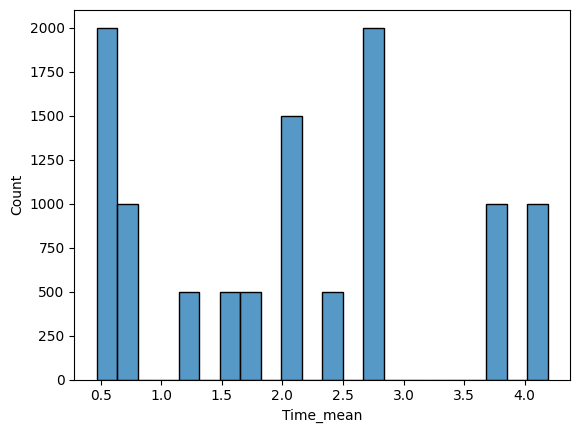

In [53]:
sns.histplot(df2['Time_mean'])

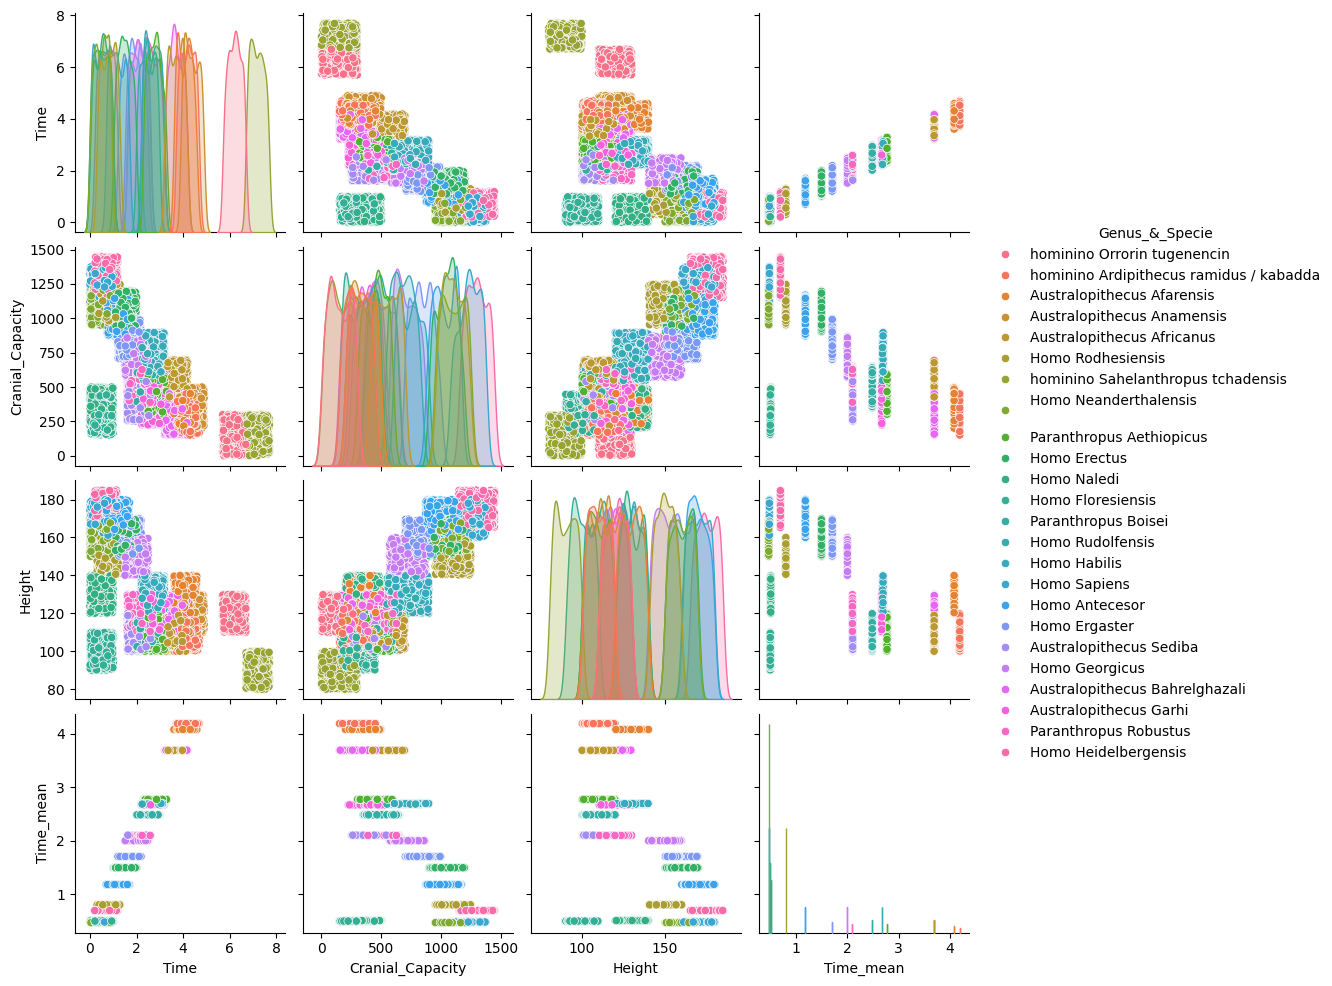

In [54]:
sns.pairplot(df2,hue='Genus_&_Specie')

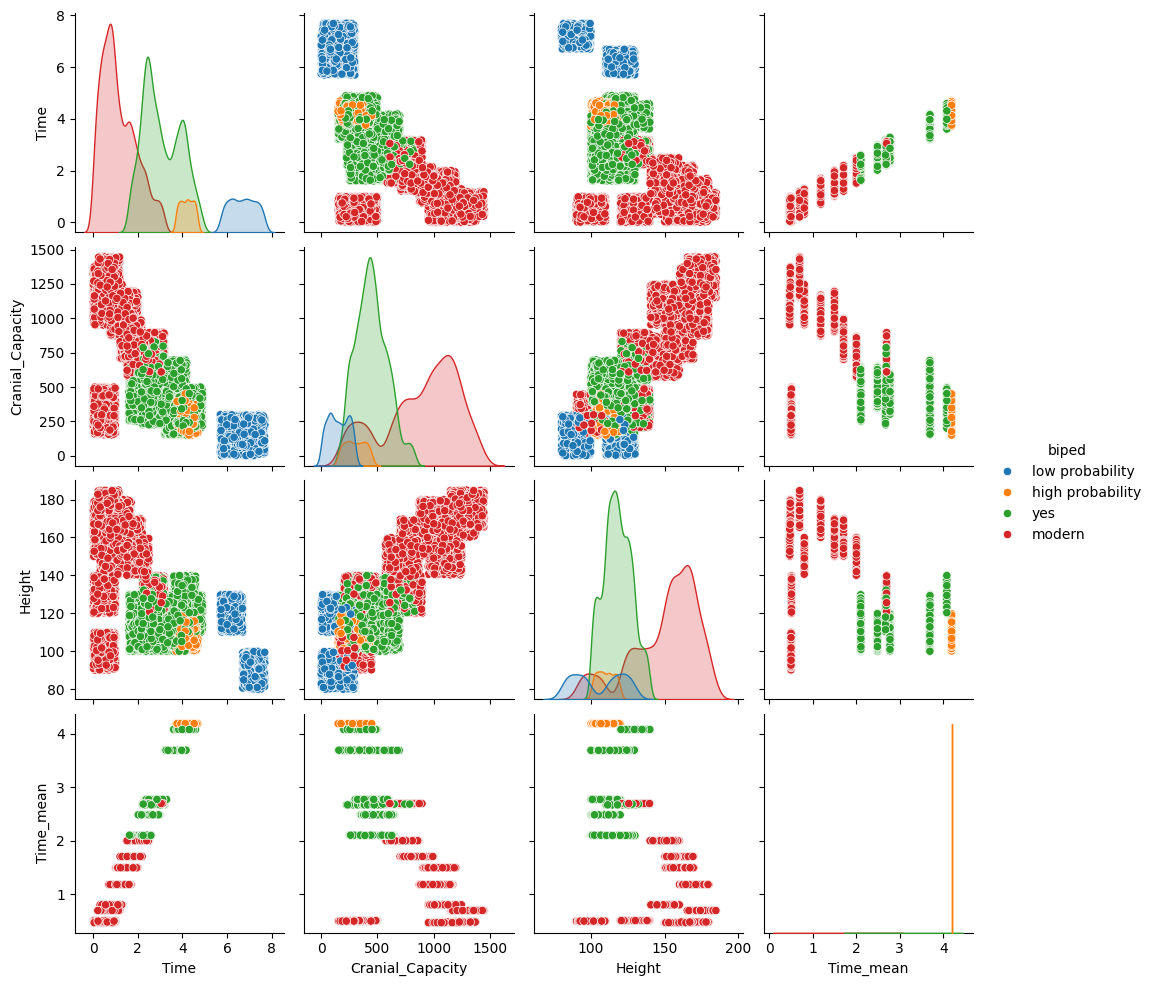

In [55]:
sns.pairplot(df2,hue='biped')

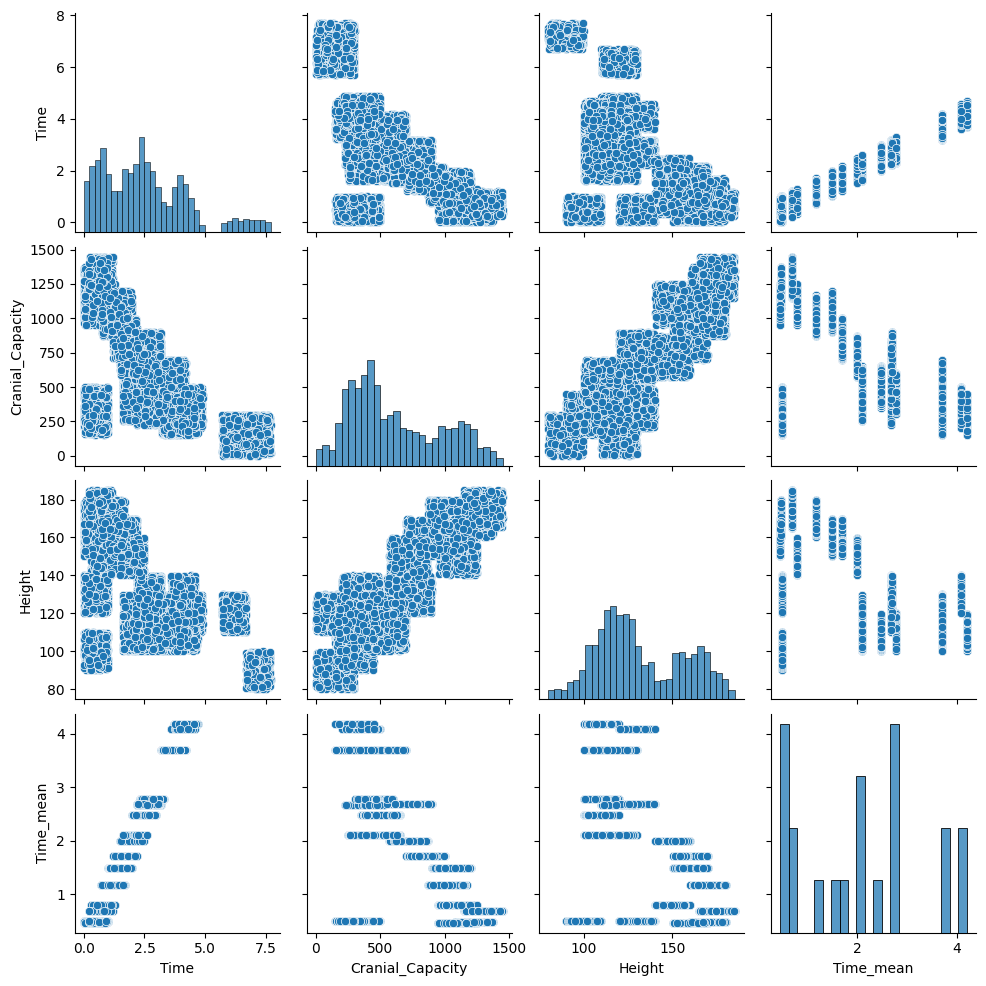

In [56]:
sns.pairplot(df2)

#### Comprobamos si nuestro target está balanceado

In [57]:
df2.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton', 'Time_mean'],
      dtype='object')

In [58]:
df2['Genus_&_Specie'].value_counts()

Genus_&_Specie
hominino Orrorin tugenencin                500
hominino Ardipithecus ramidus / kabadda    500
Paranthropus Robustus                      500
Australopithecus Garhi                     500
Australopithecus Bahrelghazali             500
Homo Georgicus                             500
Australopithecus Sediba                    500
Homo Ergaster                              500
Homo Antecesor                             500
Homo Sapiens                               500
Homo Habilis                               500
Homo Rudolfensis                           500
Paranthropus Boisei                        500
Homo Floresiensis                          500
Homo Naledi                                500
Homo Erectus                               500
Paranthropus Aethiopicus                   500
Homo Neanderthalensis\n                    500
hominino Sahelanthropus tchadensis         500
Homo Rodhesiensis                          500
Australopithecus Africanus                 50

#### Australopithecus:

###### Australopithecus Afarensis
###### Australopithecus Africanus
###### Australopithecus Anamensis
###### Australopithecus Bahrelghazali
###### Australopithecus Garhi
###### Australopithecus Sediba

#### Paranthropus:

###### Paranthropus Aethiopicus
###### Paranthropus Boisei
###### Paranthropus Robustus

#### Homo temprano:

###### Homo Habilis
###### Homo Georgicus
###### Homo Ergaster
###### Homo Erectus
###### Homo Rudolfensis
###### Homo Antecessor
###### Homo Heidelbergensis
###### Homo tardío:

#### Homo Neanderthalensis

###### Homo Rhodesiensis
###### Homo Sapiens

#### Otros:

###### Homo Floresiensis
###### Homo Naledi
###### Ardipithecus Ramidus / Kadabba
###### Sahelanthropus Tchadensis

###### Esta agrupación se basa principalmente en características anatómicas y cronológicas de cada especie

In [59]:
df2['Genus_&_Specie'].unique()

array(['hominino Orrorin tugenencin',
       'hominino Ardipithecus ramidus / kabadda',
       'Australopithecus Afarensis', 'Australopithecus Anamensis',
       'Australopithecus Africanus', 'Homo Rodhesiensis',
       'hominino Sahelanthropus tchadensis', 'Homo Neanderthalensis\n',
       'Paranthropus Aethiopicus', 'Homo Erectus', 'Homo Naledi',
       'Homo Floresiensis', 'Paranthropus Boisei', 'Homo Rudolfensis',
       'Homo Habilis', 'Homo Sapiens', 'Homo Antecesor', 'Homo Ergaster',
       'Australopithecus Sediba', 'Homo Georgicus',
       'Australopithecus Bahrelghazali', 'Australopithecus Garhi',
       'Paranthropus Robustus', 'Homo Heidelbergensis'], dtype=object)

In [60]:
grupo_homínidos = {
    'Australopithecus Afarensis': 'Australopithecus',
    'Australopithecus Africanus': 'Australopithecus',
    'Australopithecus Anamensis': 'Australopithecus',
    'Australopithecus Bahrelghazali': 'Australopithecus',
    'Australopithecus Garhi': 'Australopithecus',
    'Australopithecus Sediba': 'Australopithecus',
    'Paranthropus Aethiopicus': 'Paranthropus',
    'Paranthropus Boisei': 'Paranthropus',
    'Paranthropus Robustus': 'Paranthropus',
    'Homo Habilis': 'Homo temprano',
    'Homo Georgicus': 'Homo temprano',
    'Homo Ergaster': 'Homo temprano',
    'Homo Erectus': 'Homo temprano',
    'Homo Rudolfensis': 'Homo temprano',
    'Homo Antecesor': 'Homo temprano',
    'Homo Heidelbergensis': 'Homo temprano',
    'Homo Neanderthalensis\n': 'Homo tardío',
    'Homo Rodhesiensis': 'Homo tardío',
    'Homo Sapiens': 'Homo tardío',
    'Homo Floresiensis': 'Otros',
    'Homo Naledi': 'Otros',
    'Ardipithecus Ramidus / Kadabba': 'Hominios',
    'hominino Sahelanthropus tchadensis': 'Homininos',
    'hominino Orrorin tugenencin': 'Homininos',
    'hominino Ardipithecus ramidus / kabadda': 'Homininos',
}

df2['genero_etiqueta'] = df2['Genus_&_Specie'].map(grupo_homínidos)
df2

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton,Time_mean,genero_etiqueta
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,climbing,dry fruits,high,wide,no,old,no,light,NaN,Homininos
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,climbing,soft fruits,medium-high,wide,no,old,no,light,4.191768,Homininos
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,walk,dry fruits,high,slim,no,old,no,refined,4.081872,Australopithecus
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,climbing,dry fruits,high,wide,no,mixed,no,light,NaN,Australopithecus
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,climbing,dry fruits,high,wide,yes,old,no,light,3.691841,Australopithecus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Australopithecus Africanus,3.354085,Africa,south,South Africa,forest-gallery,676.92547,112.88961,small,conical,...,climbing,dry fruits,high,wide,yes,old,no,light,3.691841,Australopithecus
11996,Australopithecus Africanus,3.969730,Africa,south,South Africa,forest-gallery,560.41705,105.13137,small,conical,...,climbing,dry fruits,high,wide,yes,old,no,light,3.691841,Australopithecus
11997,Homo Floresiensis,0.213857,Asia,oriental,Indonesia,peninsular,222.91130,95.29501,small,U shape,...,walk,omnivore,medium-high,wide,no,mixed,no,light,0.498162,Otros
11998,Paranthropus Aethiopicus,2.859186,Africa,oriental,Kenya,forest-savanna,466.86762,101.01866,megadony,V shape,...,climbing,hard fruits,high,wide,no,old,no,robust,2.774076,Paranthropus


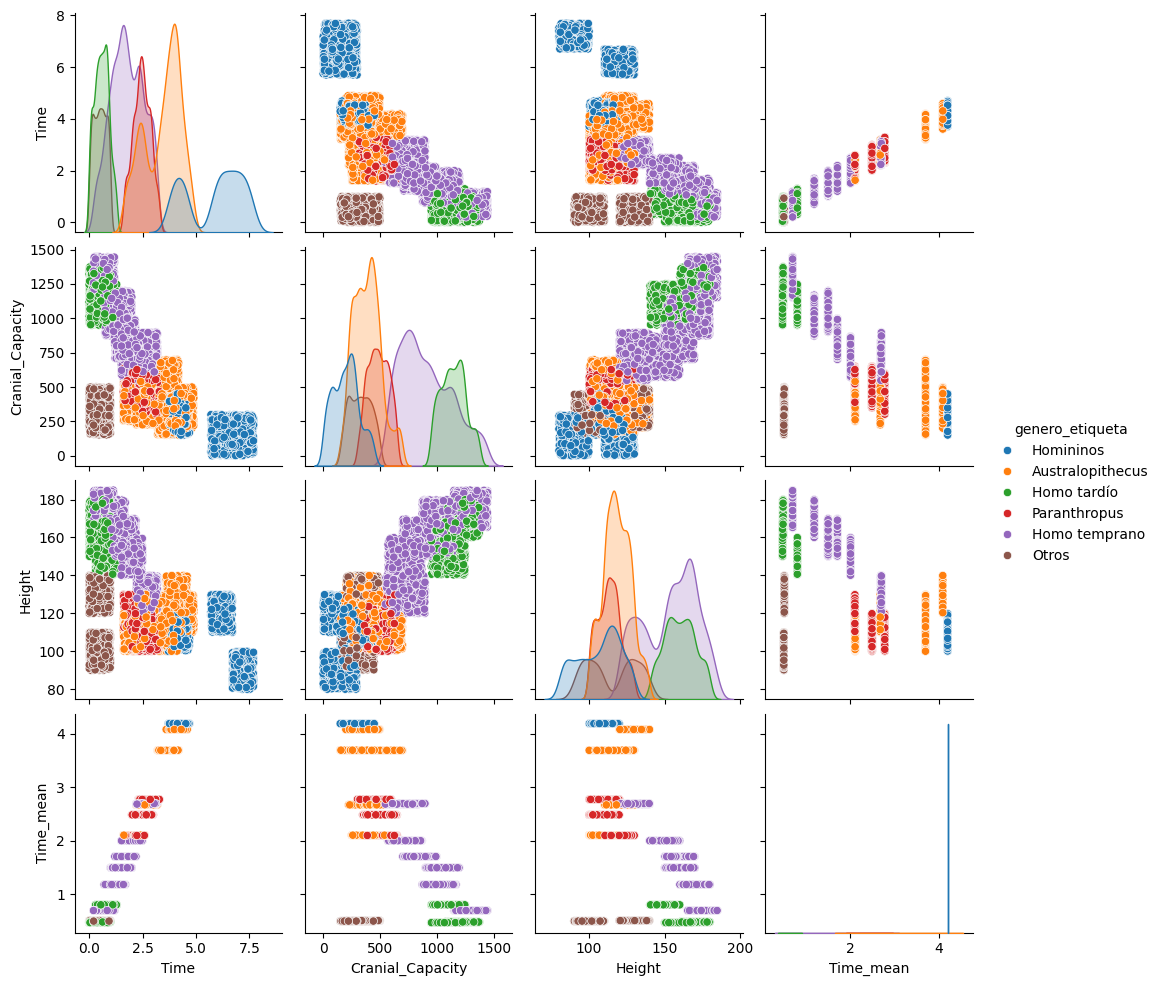

In [61]:
sns.pairplot(df2,hue='genero_etiqueta')

In [62]:
df2['Genus_&_Specie'].nunique()

24

In [63]:
df2['Genus_&_Specie'].unique()

array(['hominino Orrorin tugenencin',
       'hominino Ardipithecus ramidus / kabadda',
       'Australopithecus Afarensis', 'Australopithecus Anamensis',
       'Australopithecus Africanus', 'Homo Rodhesiensis',
       'hominino Sahelanthropus tchadensis', 'Homo Neanderthalensis\n',
       'Paranthropus Aethiopicus', 'Homo Erectus', 'Homo Naledi',
       'Homo Floresiensis', 'Paranthropus Boisei', 'Homo Rudolfensis',
       'Homo Habilis', 'Homo Sapiens', 'Homo Antecesor', 'Homo Ergaster',
       'Australopithecus Sediba', 'Homo Georgicus',
       'Australopithecus Bahrelghazali', 'Australopithecus Garhi',
       'Paranthropus Robustus', 'Homo Heidelbergensis'], dtype=object)

In [64]:
#especies = [
#    'Australopithecus Afarensis': 0,
#    'Australopithecus Africanus': 1,
#    'Australopithecus Anamensis': 2,
#    'Australopithecus Bahrelghazali': 3,
#    'Australopithecus Garhi': 4,
#    'Australopithecus Sediba': 5,
#    'Paranthropus Aethiopicus': 6,
#    'Paranthropus Boisei': 7,
#    'Paranthropus Robustus': 8,
#    'Homo Habilis': 9,
#    'Homo Georgicus': 10,
#    'Homo Ergaster': 11,
#    'Homo Erectus': 12,
#    'Homo Rudolfensis': 13,
#    'Homo Antecesor': 14,
#    'Homo Heidelbergensis': 15,
#    'Homo Neanderthalensis\n': 16,
#    'Homo Rodhesiensis': 17,
#    'Homo Sapiens': 18,
#    'Homo Floresiensis': 19,
#    'Homo Naledi': 20,
#    'Ardipithecus Ramidus / Kadabba': 21,
#    'hominino Sahelanthropus tchadensis': 22,
#    'hominino Orrorin tugenencin': 23,
#    'hominino Ardipithecus ramidus / kabadda': 24,
#]
#
#df2['genero_etiqueta_num'] = df2['genero_etiqueta'].map(grupo_homínidos_num)

In [65]:
#especies = {
#    'hominino Orrorin tugenencin':0,
#    'hominino Ardipithecus ramidus / kabadda':1,
#    'hominino Sahelanthropus tchadensis': 2,
#    'Ardipithecus Ramidus / Kadabba':3,
#    'Australopithecus Anamensis': 4,
#    'Australopithecus Afarensis': 5,
#    'Australopithecus Bahrelghazali':6,
#    'Paranthropus Aethiopicus': 7,
#    'Australopithecus Africanus': 8,
#    'Australopithecus Sediba': 9,
#    'Australopithecus Garhi': 10,
#    'Paranthropus Robustus': 11,
#    'Paranthropus Boisei': 12,
#    'Homo Habilis': 13,
#    'Homo Rudolfensis': 14,
#    'Homo Georgicus': 15,
#    'Homo Ergaster': 16,
#    'Homo Erectus': 17,
#    'Homo Antecesor': 18,
#    'Homo Heidelbergensis': 19,
#    'Homo Neanderthalensis\n': 20,
#    'Homo Rodhesiensis': 21,
#    'Homo Floresiensis': 22,
#    'Homo Naledi': 23,
#    'Homo Sapiens': 24   
#}
#
#df2['genero_especie_num'] = df2['Genus_&_Specie'].map(especies)

In [66]:
grupo_homínidos_num = {
    'Homininos':0,
    'Australopithecus':1,
    'Paranthropus':2,
    'Homo temprano':3,
    'Homo tardío':4,
    'Otros':5,
}

df2['genero_etiqueta_num'] = df2['genero_etiqueta'].map(grupo_homínidos_num)


In [67]:
df2['Location'].unique()

array(['Africa', 'Europa', 'Asia '], dtype=object)

In [68]:
label_encoder = LabelEncoder()
df2['Location_encoded'] = label_encoder.fit_transform(df2['Location'])

In [69]:
print("Valores únicos en 'Location':", df2['Location'].unique())
print("Valores codificados numéricamente:", df2['Location_encoded'].unique())

Valores únicos en 'Location': ['Africa' 'Europa' 'Asia ']
Valores codificados numéricamente: [0 2 1]


In [70]:
df2['Zone'].unique()

array(['oriental', 'south', 'central', 'west'], dtype=object)

In [71]:
label_encoder = LabelEncoder()
df2['Zone_encoded'] = label_encoder.fit_transform(df2['Zone'])
print("Valores únicos en 'Zone':", df2['Zone'].unique())
print("Valores codificados numéricamente:", df2['Zone_encoded'].unique())

Valores únicos en 'Zone': ['oriental' 'south' 'central' 'west']
Valores codificados numéricamente: [1 2 0 3]


In [72]:
df2['Current_Country'].unique() ### de momento no la voy a poner en numérica

array(['Kenya', 'Ethiopia', 'South Africa', 'Republic of Chad', 'Germany',
       'Indonesia', 'Spain', 'Georgia'], dtype=object)

In [73]:
df2['Habitat'].unique()

array(['forest', 'mixed', 'forest-gallery', 'savannah', 'cold forest',
       'forest-savanna', 'jungle', 'peninsular'], dtype=object)

In [74]:
habitat_frequencies = df2['Habitat'].value_counts(normalize=True)
habitat_frequencies

Habitat
savannah          0.333333
mixed             0.250000
forest            0.083333
forest-gallery    0.083333
cold forest       0.083333
jungle            0.083333
forest-savanna    0.041667
peninsular        0.041667
Name: proportion, dtype: float64

In [75]:
habitat_encoded = df2['Habitat'].map(habitat_frequencies)
df2['Habitat_encoded'] = habitat_encoded
### no parece que tenga mucha correlación con el target

In [76]:
df2['Incisor_Size'].unique()

array(['small', 'big', 'megadony', 'very small', 'medium large'],
      dtype=object)

In [77]:
incisor_size_mapping = {
    'very small': 1,
    'small': 2,
    'medium large': 3,
    'big': 4,
    'megadony': 5
}

df2['Incisor_Size_encoded'] = df2['Incisor_Size'].map(incisor_size_mapping)

In [78]:
df2['Jaw_Shape'].unique()

array(['conical', 'U shape', 'modern', 'V shape'], dtype=object)

In [79]:
jaw_shape_mapping = {
    'conical': 4,
    'U shape': 3,
    'modern': 2,
    'V shape': 1
}

df2['Jaw_Shape_encoded'] = df2['Jaw_Shape'].map(jaw_shape_mapping)

In [80]:
df2['Torus_Supraorbital'].unique()

array(['very protruding', 'less protruding', 'little protruding',
       'ultra protruding', 'flat'], dtype=object)

In [81]:
torus_supraorbital_mapping = {
    'ultra protruding': 0,
    'very protruding': 1,
    'less protruding': 2,
    'little protruding': 3,
    'flat': 4
}

df2['Torus_Supraorbital_encoded'] = df2['Torus_Supraorbital'].map(torus_supraorbital_mapping)


In [82]:
df2['Prognathism'].unique()

array(['high', 'medium-high', 'reduced', 'very high', 'medium', 'absent'],
      dtype=object)

In [83]:
prognathism_mapping = {
    'absent': 5,
    'reduced': 4,
    'medium': 3,
    'medium-high': 2,
    'high': 1,
    'very high': 0
}

df2['Prognathism_encoded'] = df2['Prognathism'].map(prognathism_mapping)

In [84]:
df2['Foramen_Mágnum_Position'].unique()

array(['posterior', 'semi-anterior', 'anterior', 'modern'], dtype=object)

In [85]:
foramen_mapping = {
    'posterior': 0,
    'semi-anterior': 1,
    'anterior': 2,
    'modern': 3
}

df2['Foramen_encoded'] = df2['Foramen_Mágnum_Position'].map(foramen_mapping)

In [86]:
df2['Canine Size'].unique()

array(['big', 'small'], dtype=object)

In [87]:
canine_s_mapping = {
    'big': 0,
    'small': 1,

}

df2['Canine_Size_encoded'] = df2['Canine Size'].map(canine_s_mapping)

In [88]:
df2['Canines_Shape'].unique()

array(['conicalls', 'incisiform'], dtype=object)

In [89]:
canines_shape_mapping = {
    'conicalls': 0,  # más antigua
    'incisiform': 1  # más reciente
}

df2['Canines_Shape_encoded'] = df2['Canines_Shape'].map(canines_shape_mapping)

In [90]:
df2['Tooth_Enamel'].unique()

array(['thick', 'thick-medium', 'medium-thick', 'thin', 'very thick',
       'medium-thin', 'very thin'], dtype=object)

In [91]:
tooth_enamel_mapping = {
    'thick': 0,
    'thick-medium': 1,
    'medium-thick': 1,
    'thin': 2,
    'very thick': 0,
    'medium-thin': 1,
    'very thin': 2
}


df2['Tooth_Enamel_encoded'] = df2['Tooth_Enamel'].map(tooth_enamel_mapping)

In [92]:
df2['Tecno'].unique()

array(['no', 'yes', 'likely'], dtype=object)

In [93]:
tecno_mapping ={
    'no':0,
    'yes':2,
    'likely':1}
df2['Tecno_encoded'] = df2['Tecno'].map(tecno_mapping)

In [94]:
df2['Tecno_type'].unique()

array(['no', 'mode 2', 'mode 3', 'mode 1', 'mode 4', 'primitive'],
      dtype=object)

In [95]:
tecno_type_mapping = {
    'no': 0,
    'primitive': 1,
    'mode 1': 2,
    'mode 2': 3,
    'mode 3': 4,
    'mode 4': 5,
    
}

df2['tecno_type_mapping_encoded'] = df2['Tecno_type'].map(tecno_type_mapping)

In [96]:
df2['biped'].unique()

array(['low probability', 'high probability', 'yes', 'modern'],
      dtype=object)

In [97]:
biped_mapping = {
    'modern': 3,
    'high probability': 1,
    'yes': 2,
    'low probability': 0
}

# Aplicamos la codificación numérica utilizando el diccionario
df2['Biped_encoded'] = df2['biped'].map(biped_mapping)

In [98]:
df2['Arms'].unique()

array(['climbing', 'manipulate with precision', 'manipulate'],
      dtype=object)

In [99]:
arms_mapping = {
    'climbing': 0,
    'manipulate': 1,
    'manipulate with precision':2
}

df2['arms_encoded'] = df2['Arms'].map(arms_mapping)

In [100]:
df2['Foots'].unique()

array(['climbing', 'walk'], dtype=object)

In [101]:
foots_mapping = {
    'climbing':0,
    'walk':1
}

df2['foots_encoded'] = df2['Foots'].map(foots_mapping)

In [102]:
df2['Diet'].unique()

array(['dry fruits', 'soft fruits', 'omnivore', 'carnivorous',
       'hard fruits'], dtype=object)

In [103]:
diet_mapping = {
    'carnivorous': 0,
    'omnivore': 1,
    'soft fruits': 2,
    'hard fruits': 3,
    'dry fruits': 4
}

df2['Diet_encoded'] = df2['Diet'].map(diet_mapping)

In [104]:
df2['Sexual_Dimorphism'].unique()

array(['high', 'medium-high', 'reduced'], dtype=object)

In [105]:
sexual_dimorphism_mapping = {
    'high': 0,
    'medium-high': 1,
    'reduced': 2
}

df2['Sexual_Dimorphism_encoded'] = df2['Sexual_Dimorphism'].map(sexual_dimorphism_mapping)

In [106]:
df2['Hip'].unique()

array(['wide', 'slim', 'very modern', 'modern'], dtype=object)

In [107]:
hip_mapping = {
    'very modern': 3,
    'modern': 2,
    'wide': 1,
    'slim': 0
}

df2['Hip_encoded'] = df2['Hip'].map(hip_mapping)
### no creo que esta característica sea muy crucial y no se si esta bien etiquetada

In [108]:
df2['Vertical_Front'].unique()

array(['no', 'yes', 'modern'], dtype=object)

In [109]:
vertical_front_mapping = {
    'modern': 2,
    'yes': 1,
    'no': 0
}

df2['Vertical_Front_encoded'] = df2['Vertical_Front'].map(vertical_front_mapping)

In [110]:
df2['Anatomy'].unique()

array(['old', 'mixed', 'very modern', 'modern'], dtype=object)

In [111]:
anatomy_mapping = {
    'old': 0,
    'mixed': 1,
    'modern': 2,
    'very modern': 3
}

df2['Anatomy_encoded'] = df2['Anatomy'].map(anatomy_mapping)

In [112]:
df2['Migrated'].unique()

array(['no', 'yes'], dtype=object)

In [113]:
label_encoder = LabelEncoder()
df2['Migrated_encoded'] = label_encoder.fit_transform(df2['Migrated'])

In [114]:
df2['Skeleton'].unique()

array(['light', 'refined', 'robust'], dtype=object)

In [115]:
skeleton_mapping = {
    'light':2, 
    'refined':1, 
    'robust':0
}

df2['Skeleton_encoded'] = df2['Skeleton'].map(skeleton_mapping)

In [116]:
especies = {
    'hominino Orrorin tugenencin':0,
    'hominino Sahelanthropus tchadensis': 1,
    'hominino Ardipithecus ramidus / kabadda':2,
    'Ardipithecus Ramidus / Kadabba':3,
    'Australopithecus Anamensis': 4,
    'Australopithecus Afarensis': 5,
    'Australopithecus Bahrelghazali':6,
    'Australopithecus Africanus': 7,
    'Australopithecus Garhi': 8,
    'Australopithecus Sediba': 9,
    'Paranthropus Aethiopicus': 10,
    'Paranthropus Robustus': 11,
    'Paranthropus Boisei': 12,
    'Homo Habilis': 13,
    'Homo Rudolfensis': 14,
    'Homo Georgicus': 15,
    'Homo Ergaster': 16,
    'Homo Erectus': 17,
    'Homo Naledi': 18,
    'Homo Floresiensis': 19,
    'Homo Antecesor': 20,
    'Homo Heidelbergensis': 21,
    'Homo Rodhesiensis': 22,
    'Homo Neanderthalensis\n': 23,
    'Homo Sapiens': 24   
}

df2['genero_especie_num'] = df2['Genus_&_Specie'].map(especies)

In [117]:
df= df2[['genero_etiqueta','Time','Time_mean',
       'Location_encoded',
       'Zone_encoded', 'Habitat_encoded', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded',
       'Diet_encoded', 'Sexual_Dimorphism_encoded', 'Hip_encoded',
       'Vertical_Front_encoded', 'Anatomy_encoded', 'Migrated_encoded','genero_etiqueta_num','genero_especie_num']]

In [118]:
df.shape

(12000, 26)

In [119]:
df.to_csv('../data/processed/df_encoded.csv',index=False)

In [120]:
df_genus_encoded= df2[['Genus_&_Specie','genero_etiqueta','Time',
       'Location_encoded',
       'Zone_encoded', 'Habitat_encoded', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded',
       'Diet_encoded', 'Sexual_Dimorphism_encoded', 'Hip_encoded',
       'Vertical_Front_encoded', 'Anatomy_encoded', 'Migrated_encoded','genero_especie_num']]

In [121]:
df

,genero_etiqueta,Time,Time_mean,Location_encoded,Zone_encoded,Habitat_encoded,Incisor_Size_encoded,Jaw_Shape_encoded,Torus_Supraorbital_encoded,Prognathism_encoded,...,Biped_encoded,foots_encoded,Diet_encoded,Sexual_Dimorphism_encoded,Hip_encoded,Vertical_Front_encoded,Anatomy_encoded,Migrated_encoded,genero_etiqueta_num,genero_especie_num
0,Homininos,6.041124,NaN,0,1,0.083333,2,4,1,1,...,0,0,4,0,1,0,0,0,0,0
1,Homininos,4.383910,4.191768,0,1,0.250000,2,4,1,1,...,1,0,2,1,1,0,0,0,0,2
2,Australopithecus,3.749413,4.081872,0,1,0.250000,4,3,1,1,...,2,1,4,0,0,0,0,0,1,5
3,Australopithecus,4.595606,NaN,0,1,0.083333,4,3,1,1,...,2,0,4,0,1,0,1,0,1,4
4,Australopithecus,3.614060,3.691841,0,2,0.083333,2,4,1,2,...,2,0,4,0,1,1,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Australopithecus,3.354085,3.691841,0,2,0.083333,2,4,1,2,...,2,0,4,0,1,1,0,0,1,7
11996,Australopithecus,3.969730,3.691841,0,2,0.083333,2,4,1,2,...,2,0,4,0,1,1,0,0,1,7
11997,Otros,0.213857,0.498162,1,1,0.041667,2,3,3,2,...,3,1,1,1,1,0,1,0,5,19
11998,Paranthropus,2.859186,2.774076,0,1,0.041667,5,1,0,0,...,2,0,3,0,1,0,0,0,2,10


<Axes: >

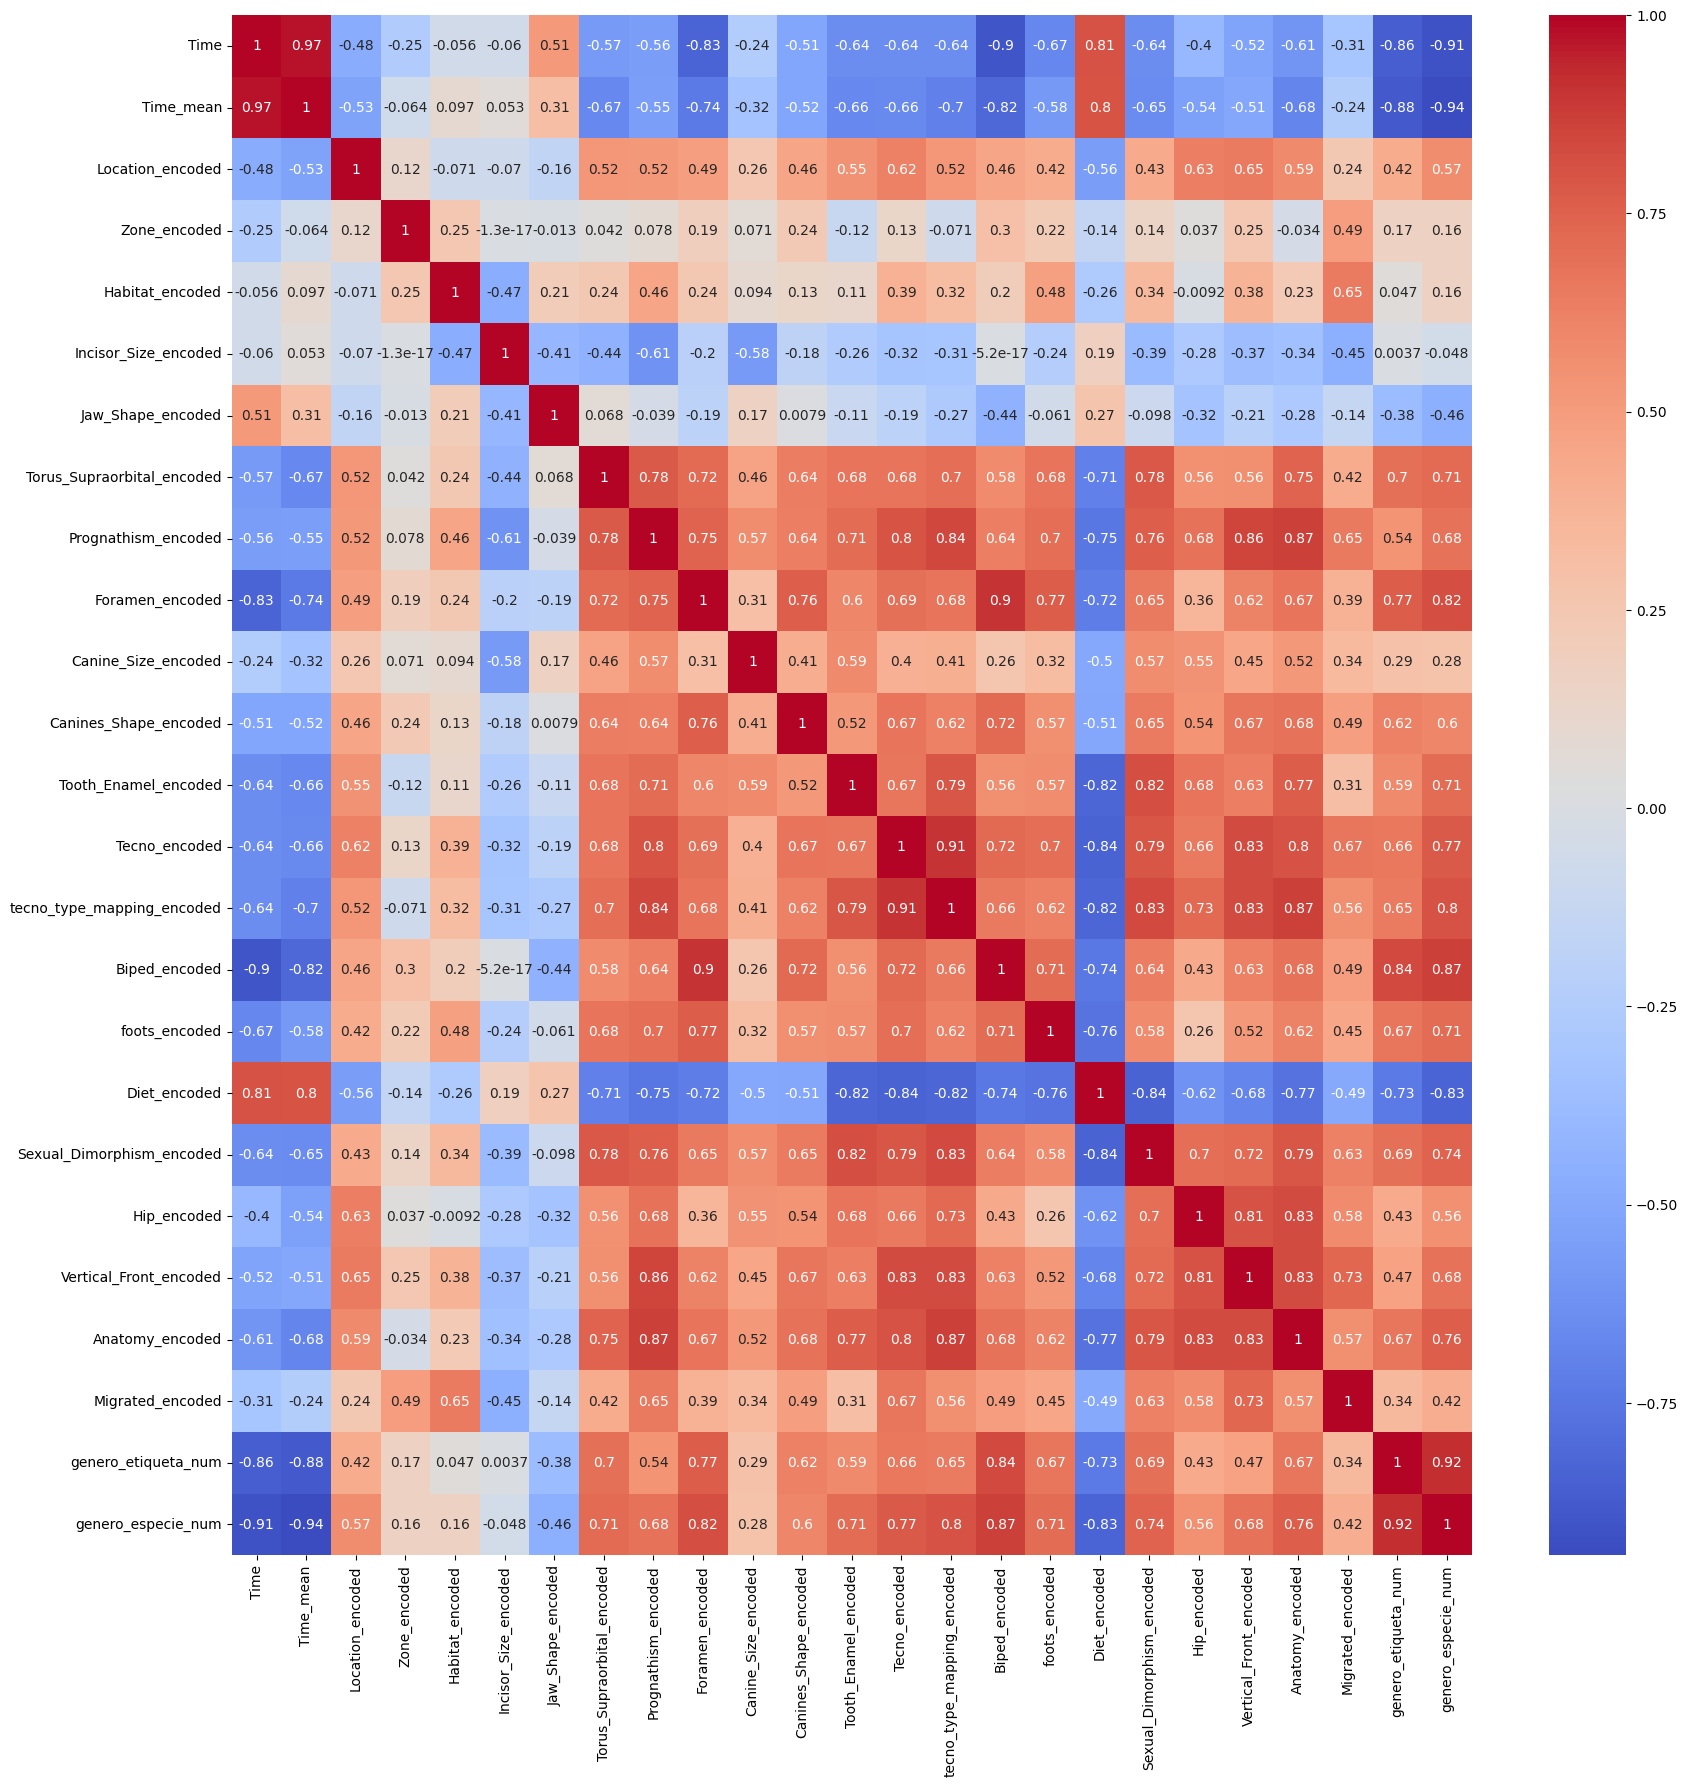

In [122]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [123]:
df2

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,arms_encoded,foots_encoded,Diet_encoded,Sexual_Dimorphism_encoded,Hip_encoded,Vertical_Front_encoded,Anatomy_encoded,Migrated_encoded,Skeleton_encoded,genero_especie_num
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,0,0,4,0,1,0,0,0,2,0
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,0,0,2,1,1,0,0,0,2,2
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,0,1,4,0,0,0,0,0,1,5
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,0,0,4,0,1,0,1,0,2,4
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,0,0,4,0,1,1,0,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Australopithecus Africanus,3.354085,Africa,south,South Africa,forest-gallery,676.92547,112.88961,small,conical,...,0,0,4,0,1,1,0,0,2,7
11996,Australopithecus Africanus,3.969730,Africa,south,South Africa,forest-gallery,560.41705,105.13137,small,conical,...,0,0,4,0,1,1,0,0,2,7
11997,Homo Floresiensis,0.213857,Asia,oriental,Indonesia,peninsular,222.91130,95.29501,small,U shape,...,0,1,1,1,1,0,1,0,2,19
11998,Paranthropus Aethiopicus,2.859186,Africa,oriental,Kenya,forest-savanna,466.86762,101.01866,megadony,V shape,...,0,0,3,0,1,0,0,0,0,10


In [124]:
df_genus_encoded.to_csv('../data/processed/df_genus_encoded.csv',index=False)

In [125]:
df_genus_encoded.shape

(12000, 25)

## Modelo de clasificación:
#### Quiero poder predecir el género y especie en función del resto de columnas, de manera que podamos facilitar la clasificación de restos encontrados de manera más rápida y exacta y facilitar los trabajos de investigación para poder dedicar tiempo y recursos a otros campos de la investigación.
#### En el futuro obtendremos todos los datos de las columnas usadas ya que son registos básicos de cualquier descubrimiento de nuevos fósiles y puede que haya que hacer nuevos modelos, en función de cómo vaya avanzando la investigación paleontológica y se puedan registrar nuevas columnas determinantes en la asignación de nuestro traget

##### Investigación científica: Un modelo de clasificación preciso puede ayudar a los paleoantropólogos y biólogos evolutivos a identificar y clasificar restos fósiles de homínidos de manera más eficiente. Esto puede conducir a nuevas comprensiones sobre la evolución humana y el desarrollo de la anatomía.

##### Conservación y preservación: En áreas donde se encuentran restos fósiles de homínidos, como sitios arqueológicos, un modelo de clasificación puede ayudar a preservar estos recursos importantes. Identificar rápidamente los restos fósiles y clasificarlos adecuadamente puede facilitar la conservación de estos sitios para futuras generaciones.

##### Educación y divulgación: Un modelo de clasificación bien desarrollado podría utilizarse en entornos educativos para enseñar a estudiantes sobre la diversidad de homínidos y su evolución a lo largo del tiempo. Esto podría aumentar la comprensión pública sobre la historia de la humanidad y la ciencia detrás de la paleoantropología.

##### Turismo y atracción de visitantes: En regiones con importantes hallazgos paleontológicos, un modelo de clasificación de homínidos podría ayudar a impulsar el turismo científico y cultural. Los sitios arqueológicos podrían convertirse en destinos populares para investigadores y turistas interesados en la historia de la humanidad.

##### Aplicaciones médicas y biomiméticas: Comprender la evolución de la anatomía humana puede tener aplicaciones en campos como la medicina y la ingeniería biomimética. Un modelo de clasificación preciso podría ayudar a identificar similitudes y diferencias entre las diferentes especies de homínidos, lo que podría conducir a avances en el tratamiento de enfermedades y el diseño de tecnologías inspiradas en la naturaleza.

##### En resumen, un modelo de machine learning de clasificación para homínidos basado en variables anatómicas de localización podría tener una amplia gama de aplicaciones prácticas y beneficios tanto en el ámbito científico como en el comercial.
